In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
from sklearn.preprocessing import normalize

## Libraries and Filesystem Setup

In [2]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import scipy
from sklearn.cluster import KMeans

### Import BOW stemmed document vectors

In [6]:
bow_stemmed_matrix = np.load('../../processed_files/bow_stemmed_matrix.npy')
df_merged = pickle.load(open("../../processed_files/df_merged.pickle", "rb"))

In [7]:
df_merged.head()

,DOMAIN,RAW_CONTENT,RAW_CONTENT_PROCESSED,RAW_CONTENT_PROCESSED_STEMMED
0,0-my.com,0-my.com related searches: related searches:,"[mycom, related, searches, related, searches]","[0, -, m, y, ., c, o, m, , r, e, l, a, t, e, ..."
1,00bitz.com,error. page cannot be displayed. please contac...,"[error, page, cannot, displayed, please, conta...","[e, r, r, o, r, ., , p, a, g, e, , c, a, n, ..."
2,01187.com,01187.com is available for purchase! - wwwv1.c...,"[com, vailable, purchase, wwwvcom, welcome, uu...","[0, 1, 1, 8, 7, ., c, o, m, , i, s, , a, v, ..."
3,027.ir,"027.ir - dns4.ir 027.ir hits: 7,267 under cons...","[ir, dnsir, ir, hits, construction, coming, so...","[0, 2, 7, ., i, r, , -, , d, n, s, 4, ., i, ..."
4,03h.org,february | 2014 | online marketing review sear...,"[february, online, marketing, review, search, ...","[f, e, b, r, u, a, r, y, , |, , 2, 0, 1, 4, ..."


In [8]:
df_merged.shape

(12975, 4)

In [10]:
print(bow_stemmed_matrix.shape)
print(bow_stemmed_matrix[0].shape)

(12975, 4935)
(4935,)


## bow stemmed

In [11]:
#new_tfidf_matrix = tfidf_matrix.todense() / np.linalg.norm(tfidf_matrix.todense())

In [12]:
num_clusters = 20
algorithm = 'full'

In [13]:
%%time
kmeans = KMeans(n_clusters=num_clusters, random_state=0, algorithm=algorithm).fit(bow_stemmed_matrix)

CPU times: user 5min 18s, sys: 15.8 s, total: 5min 34s
Wall time: 43.7 s


In [14]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [15]:
index_cluster = zip(range(len(kmeans.labels_)), kmeans.labels_)
index_cluster_dict = dict(index_cluster)
index_cluster_dict[456]

5

In [16]:
cluster_index = list(zip(kmeans.labels_, range(len(kmeans.labels_))))

In [17]:
cluster_list = dict()
for i in range(num_clusters):
    cluster_list[i] = list(filter(lambda row: row[0] == i, cluster_index))

In [18]:
cluster_list[0]

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 13),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 58),
 (0, 61),
 (0, 63),
 (0, 64),
 (0, 66),
 (0, 67),
 (0, 69),
 (0, 70),
 (0, 73),
 (0, 75),
 (0, 77),
 (0, 78),
 (0, 80),
 (0, 81),
 (0, 83),
 (0, 85),
 (0, 86),
 (0, 87),
 (0, 89),
 (0, 95),
 (0, 96),
 (0, 97),
 (0, 98),
 (0, 99),
 (0, 102),
 (0, 103),
 (0, 104),
 (0, 109),
 (0, 112),
 (0, 113),
 (0, 116),
 (0, 117),
 (0, 120),
 (0, 121),
 (0, 122),
 (0, 123),
 (0, 124),
 (0, 125),
 (0, 127),
 (0, 129),
 (0, 130),
 (0, 131),
 (0, 133),
 (0, 134),
 (0, 135),
 (0, 136),
 (0, 137),
 (0, 138),
 (0, 139),
 (0, 140),
 (0, 141),
 (0, 142),
 (0, 143),
 (0, 144),
 (0, 145),
 (0, 146),
 (0, 147),
 (0, 149),
 (0, 150),
 (0, 151),
 (0, 152),
 (0, 153),
 (0, 154),
 

In [19]:
print(kmeans.labels_.shape)
print(kmeans.cluster_centers_.shape)

(12975,)
(20, 4935)


In [20]:
import statistics

# index is cluster index
def intracluster_similarity(index):
    cluster_centroid = kmeans.cluster_centers_[index]
    dist_list = []
    cluster = cluster_list[index]
    for i in cluster:
        distance = np.linalg.norm(cluster_centroid-bow_stemmed_matrix[i[1]])
        dist_list.append(distance)
        
    #avg = sum_dist/(len(indices[index])-1)
    avg = np.average(dist_list)

    #variance = statistics.variance(dist_list)
    variance = np.var(dist_list)
    
    return avg, variance

In [21]:
intracluster_similarity(19)

(4722.843173267896, 7235941.510055195)

In [22]:
# index is cluster / cluster id
def generate_raw_content_cluster_df(index):
    index_list = cluster_list[index]
    index_list = [x[1] for x in index_list]
    cluster_seed = df_merged.loc[index].to_frame().T
    #cluster_df = df_merged.loc[index_list[1:]]
    cluster_df = df_merged.loc[index_list[1:]]
    combined = pd.concat([cluster_seed, cluster_df])
    combined['cluster'] = index
    return combined

In [23]:
generate_raw_content_cluster_df(1)

,DOMAIN,RAW_CONTENT,RAW_CONTENT_PROCESSED,RAW_CONTENT_PROCESSED_STEMMED,cluster
1,00bitz.com,error. page cannot be displayed. please contac...,"[error, page, cannot, displayed, please, conta...","[e, r, r, o, r, ., , p, a, g, e, , c, a, n, ...",1


In [24]:
avg_list = []
variance_list = []

for i in range(num_clusters):
    avg, variance = intracluster_similarity(i)
    avg_list.append(avg)
    variance_list.append(variance)
    #print()

([<matplotlib.axis.XTick at 0x1b69835d30>,
 <a list of 11 Text xticklabel objects>)

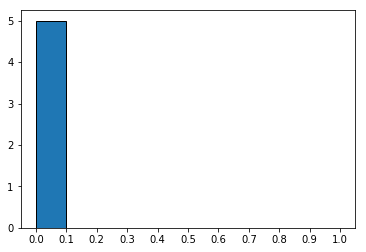

In [30]:
# neighbors = 20
bins= [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.hist(avg_list, bins=bins, edgecolor="k")
plt.xticks(bins)

## Intercluster Similarity

In [26]:
def intercluster_dist():
    indices = range(len(kmeans.cluster_centers_))
    centroid_centroid_distance = {}
    values = []
    for i in indices:
        for j in indices:
            if i < j:
                key = str(i) + "::" + str(j)
                distance = np.linalg.norm(kmeans.cluster_centers_[i] - kmeans.cluster_centers_[j])
                centroid_centroid_distance[key] = distance
                values.append(distance)
    return centroid_centroid_distance, values

## number of clusters = 20

In [27]:
intercluster_distances, values = intercluster_dist()
#print('distances', values)
print('average', np.average(values))

average 47163.73751975763
